<a href="https://colab.research.google.com/github/AliAkbarBadri/complex-networks-basics/blob/main/network_parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setuping

In [3]:
import pandas as pd
import networkx as nx
import scipy.io
import matplotlib.pyplot as plt
import collections
import numpy as np
from collections import Counter
import itertools
from numpy.linalg import matrix_power
import random
import sys

In [4]:
! wget "https://github.com/AliAkbarBadri/complex-networks-basics/blob/main/facebook101_princton_weighted.mat?raw=true" -O "facebook101_princton_weighted.mat"

--2020-12-02 20:21:21--  https://github.com/AliAkbarBadri/complex-networks-basics/blob/main/facebook101_princton_weighted.mat?raw=true
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/AliAkbarBadri/complex-networks-basics/raw/main/facebook101_princton_weighted.mat [following]
--2020-12-02 20:21:21--  https://github.com/AliAkbarBadri/complex-networks-basics/raw/main/facebook101_princton_weighted.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AliAkbarBadri/complex-networks-basics/main/facebook101_princton_weighted.mat [following]
--2020-12-02 20:21:22--  https://raw.githubusercontent.com/AliAkbarBadri/complex-networks-basics/main/facebook101_princton_weighted.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 

# Reading Data

In [5]:
mat = scipy.io.loadmat('facebook101_princton_weighted.mat')
print(mat.keys())
print(mat['A'].shape[0])
print(mat['A'])

dict_keys(['__header__', '__version__', '__globals__', 'A'])
6596
  (41, 0)	0.23341986187511532
  (74, 0)	-0.8310836341707424
  (183, 0)	0.3630774693417993
  (199, 0)	-0.4255819109410841
  (330, 0)	-0.8915522179046713
  (342, 0)	0.6004699460747422
  (438, 0)	0.559033155005757
  (638, 0)	-0.15789912487319158
  (639, 0)	-0.3689795200377264
  (700, 0)	0.667096028355807
  (762, 0)	0.6388290129260563
  (790, 0)	-0.5971903653879409
  (813, 0)	-0.9203448232766431
  (908, 0)	-0.5661217215565775
  (1001, 0)	-0.40887388509123834
  (1074, 0)	0.14383939484847108
  (1084, 0)	0.4229554254707699
  (1179, 0)	0.3118105095583956
  (1195, 0)	0.014127530389211218
  (1226, 0)	-0.47309716640306787
  (1252, 0)	-0.013995007645000168
  (1343, 0)	-0.3969440595287481
  (1415, 0)	0.49268599971253546
  (1435, 0)	-0.21118357393040132
  (1489, 0)	-0.250254338391553
  :	:
  (3083, 6595)	-0.2566179533318984
  (3255, 6595)	-0.16483967626475793
  (3311, 6595)	-0.9284036578868178
  (3487, 6595)	0.9428205382791961
  (3647

In [6]:
G = nx.from_scipy_sparse_matrix(mat['A'])
print(G.number_of_nodes())
print(G.number_of_edges())

6596
293320


In [7]:
G.get_edge_data(6568,6595)

{'weight': -0.05460279445991589}

# Social Network Graph

## Plotting Degree Distribution

http://snap.stanford.edu/class/cs224w-2012/nx_tutorial.pdf

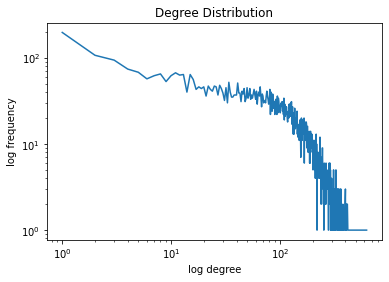

In [ ]:
degs = {}
for n in G.nodes():
  deg = G.degree(n) 
  if deg not in degs:
    degs[deg] = 0 
  degs[deg] += 1
items = sorted(degs.items())

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([k for (k,v) in items], [v for (k,v) in items]) 
ax.set_xlabel("log degree")
ax.set_ylabel("log frequency")
ax.set_xscale('log') 
ax.set_yscale('log')
plt.title("Degree Distribution")
plt.show()

# fig.savefig("degree_distribution.png")

## Plotting Eigen Value Distribution

In [ ]:
adj_spectrum = nx.linalg.spectrum.adjacency_spectrum(G, weight=None)
adj_spectrum

array([169.85596686+0.j, 108.61347417+0.j, 104.11311476+0.j, ...,
        -1.        +0.j,  -1.        +0.j,  -1.        +0.j])

In [ ]:
len(adj_spectrum)

6596

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:854: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:1969: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


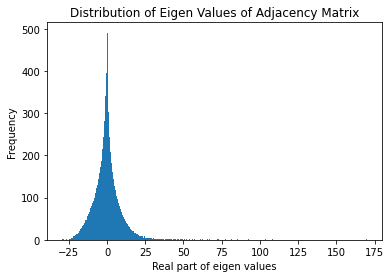

In [ ]:
plt.hist(adj_spectrum, bins=300)
plt.xlabel("Real part of eigen values")
plt.ylabel("Frequency")
plt.title("Distribution of Eigen Values of Adjacency Matrix")
plt.show()

## The number of paths of length 10

In [8]:
# good

adj_mat = nx.to_numpy_matrix(G, weight=None)
adj_10 = matrix_power(adj_mat, 10)
np.sum(adj_10)

5.994817000009178e+25

In [ ]:
# bad

adj_mat = nx.linalg.graphmatrix.adjacency_matrix(G, weight=None)
adj_mat_5 = adj_mat**5
np.sum(adj_mat_5)

427420070161162

In [ ]:
# adj_mat_6 = np.matmul(adj_mat_5.todense(), adj_mat.todense())

## Number of connected components

In [ ]:
g_adj = G.adj

In [10]:
def connected_components(graph):
  all_seen = set()
  for v in graph:
    if v not in all_seen:
      G_adj = graph.adj
      seen = set()
      nextlevel = {v}
      while nextlevel:
        thislevel = nextlevel
        nextlevel = set()
        for v in thislevel:
          if v not in seen:
              seen.add(v)
              nextlevel.update(G_adj[v])
      all_seen.update(seen)
      yield seen

In [ ]:
connected_components_list = [G.subgraph(c).copy() for c in connected_components(G)]
len(connected_components_list)

10

In [ ]:
for component in connected_components_list:
  print(component.number_of_nodes())

6575
2
3
2
2
3
3
2
2
2


## Longest Path Length

In [19]:
import sys
sys.setrecursionlimit(50000)
print(sys.getrecursionlimit())

50000


In [17]:
def DFS(graph, src, prev_len, max_len, visited): 
  visited[src] = 1 
  curr_len = 0
  adjacent = None
  G_adj = graph.adj
  for adjacent in list(G_adj[src].keys()): 
    if not visited[adjacent]: 
        curr_len = prev_len + 1
        DFS(graph, adjacent, curr_len, max_len, visited) 
    if (max_len[0] < curr_len):  
        max_len[0] = curr_len  
    curr_len = 0

In [ ]:
max_len = [-999999999999]
G0 = connected_components_list[0]
for node in G0.nodes():
  if node%250 == 0:
    print(node)
  visited = [False] * G.number_of_nodes()
  DFS(G0, node, 0, max_len, visited)

print()
print(max_len[0])

0
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750
5000
5250
5500
5750
6000
6250
6500

5896


In [ ]:
v=None
G0 = connected_components_list[0]
e = {}
for i, n in enumerate(G0.nbunch_iter(v)):
  if i % 250==0:
    print(i)
  length = nx.single_source_shortest_path_length(G0, n)
  L = len(length)
  e[n] = max(length.values())

print(max(e.values()))

0
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750
5000
5250
5500
5750
6000
6250
6500
9


## Global clustering coefficient
http://www2.unb.ca/~ddu/6634/Lecture_notes/Lec3_network_statistics_handout.pdf

In [23]:
def triangles_and_degree(G, nodes=None):
  nodes_nbrs = G.adj.items()
  for v, v_nbrs in nodes_nbrs:
    vs = set(v_nbrs) - {v}
    gen_degree = Counter(len(vs & (set(G[w]) - {w})) for w in vs)
    ntriangles = sum(k * val for k, val in gen_degree.items())
    yield (len(vs), ntriangles)

In [ ]:
temp = [[d*(d-1),t] for d, t in triangles_and_degree(G)]
contri, triangles = np.array(temp).sum(axis=0)
print(triangles, contri)
print(triangles / contri)

15123246 92279402
0.1638853923218965


In [ ]:
vs = set(G.adj[1]) - {1}
print(vs)
print()
for w in vs:
  print("Node:", w)
  print(set(G[w]) - {w})
  print(len(vs & (set(G[w]) - {w})))
  print()
gen_degree = Counter(len(vs & (set(G[w]) - {w})) for w in vs)
print(gen_degree)

{3776, 2657, 3010, 5323, 1361, 881, 5044, 3255, 538, 4476, 1213}

Node: 3776
{4992, 1, 4613, 1286, 1543, 4103, 2061, 538, 3995, 3103, 1824, 1444, 5159, 2218, 940, 6068, 3255, 3010, 1989, 5701, 5066, 5067, 4556, 5323, 2640, 1361, 3668, 3926, 5591, 4056, 6238, 2923, 2672, 2289, 5236, 4726}
5

Node: 2657
{1, 4098, 1546, 2059, 5140, 5653, 5142, 5656, 538, 539, 1051, 6171, 6179, 1063, 4649, 5164, 1070, 2607, 4142, 4145, 5169, 6194, 1590, 3640, 3133, 4160, 1091, 2629, 3656, 1097, 2633, 75, 2634, 1101, 1616, 3152, 83, 3156, 5203, 5719, 99, 4091, 1640, 2664, 6247, 5227, 1135, 3185, 6258, 4724, 1657, 125, 1672, 137, 1163, 657, 5267, 4245, 3225, 2202, 5790, 1183, 3233, 1188, 2212, 4772, 1191, 6311, 5631, 5292, 685, 686, 6318, 2737, 690, 3764, 3254, 3768, 4793, 4794, 1213, 2238, 4285, 4799, 5831, 4810, 5323, 3792, 1747, 725, 3803, 733, 1759, 4836, 741, 1254, 6372, 4840, 4331, 3308, 3309, 3825, 1276, 3325, 6396, 1791, 2304, 5376, 1284, 2311, 3335, 268, 5901, 4366, 271, 275, 6419, 5909, 3353, 5914,

# GNP

## Generate Graph

In [5]:
G_np = nx.generators.random_graphs.gnp_random_graph(6596, 0.02)

In [19]:
def generate_random_graph(n, p):
  edges = itertools.combinations(range(n), 2)
  G = nx.Graph()
  G.add_nodes_from(range(n))
  if p <= 0:
    return G
  if p >= 1:
    return nx.complete_graph(n, create_using=G)
  for e in edges:
    if random.uniform(0,1) < p:
      G.add_edge(*e)
  return G

In [20]:
G_np = generate_random_graph(6596, 0.02)

## Plotting Degree Distribution

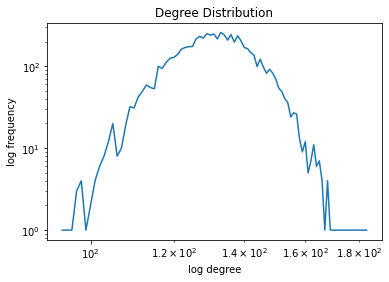

In [6]:
degs = {}
for n in G_np.nodes():
  deg = G_np.degree(n) 
  if deg not in degs:
    degs[deg] = 0 
  degs[deg] += 1
items = sorted(degs.items())

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([k for (k,v) in items], [v for (k,v) in items]) 
ax.set_xlabel("log degree")
ax.set_ylabel("log frequency")
ax.set_xscale('log') 
ax.set_yscale('log')
plt.title("Degree Distribution")
plt.show()

# fig.savefig("degree_distribution.png")

## Plotting Eigen Value Distribution

In [7]:
adj_spectrum = nx.linalg.spectrum.adjacency_spectrum(G_np, weight=None)
adj_spectrum

array([ 1.33052909e+02+0.j, -2.28430520e+01+0.j, -2.27986787e+01+0.j, ...,
       -2.19304530e-02+0.j, -3.96105748e-02+0.j, -6.71170113e-01+0.j])

In [8]:
len(adj_spectrum)

6596

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:854: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:1969: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


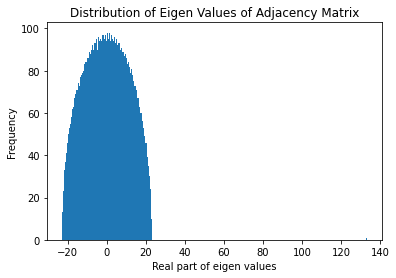

In [9]:
plt.hist(adj_spectrum, bins=300)
plt.xlabel("Real part of eigen values")
plt.ylabel("Frequency")
plt.title("Distribution of Eigen Values of Adjacency Matrix")
plt.show()

## Number of connected components

In [11]:
connected_components_list_np = [G_np.subgraph(c).copy() for c in connected_components(G_np)]
len(connected_components_list_np)

1

In [12]:
for component in connected_components_list_np:
  print(component.number_of_nodes())

6596


## Longest Path Length

In [20]:
max_len = [-999999999999]
G0 = connected_components_list_np[0]
for node in G0.nodes():
  if node%250 == 0:
    print(node)
  visited = [False] * G_np.number_of_nodes()
  DFS(G0, node, 0, max_len, visited)

print()
print(max_len[0])

0
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750
5000
5250
5500
5750
6000
6250
6500

6526


## Global clustering coefficient

In [24]:
temp = [[d*(d-1),t] for d, t in triangles_and_degree(G_np)]
contri, triangles = np.array(temp).sum(axis=0)
print(triangles, contri)
print(triangles / contri)

2305104 115058532
0.020034185730789612
